Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = ""

---

# CS110 Pre-class Work 4.1

## Question 1. (Exercise 6.5-1 from Cormen et al.)

Illustrate the operation of $HEAP-EXTRACT-MAX$ on the heap $A= \langle 15, 13, 9, 5, 12, 8, 7, 4, 0, 6, 2, 1 \rangle$


YOUR ANSWER HERE

## Question 2. (Exercise 6.5-2 from Cormen et al.)

Illustrate the operation of $MAX-HEAP-INSERT(A, 10)$ on the heap $A=\langle 15, 13, 9, 5, 12, 8, 7, 4, 0, 6, 2, 1\rangle$.

YOUR ANSWER HERE

## Question 3. Implementing Priority Queues Using Max and Min Heap Data Structures 

The next cell contains a Python implementation of a very basic priority queue based on a max heap data structure.<br>
Please read and follow the <b>Instructions and Tasks</b> that are included below the next cell. These instructions and exercises will guide you through the Python code (i.e., <i><b>skip the Python code for now</b></i> and first proceed to read the instructions below the cell containing the Python code.) 

In [2]:
# 
# Defining some basic binary tree functions
#
def left(i):         # left(i): takes as input the array index of a parent node in the binary tree and 
    return 2*i + 1   #          returns the array index of its left child.

def right(i):        # right(i): takes as input the array index of a parent node in the binary tree and 
    return 2*i + 2   #           returns the array index of its right child.

def parent(i):       # parent(i): takes as input the array index of a node in the binary tree and
    return (i-1)//2  #            returns the array index of its parent


# Defining the Python class MaxHeapq to implement a max heap data structure.
# Every Object in this class has two attributes:
#           - heap : A Python list where key values in the max heap are stored
#           - heap_size: An integer counter of the number of keys present in the max heap
class MaxHeapq:
    """ 
    This class implements properties and methods that support a max priority queue data structure
    """  
    # Class initialization method. Use: heapq_var = MaxHeapq()
    def __init__(self):        
        self.heap       = []
        self.heap_size  = 0

    # This method returns the highest key in the priority queue. 
    #   Use: key_var = heapq_var.max()
    def maxk(self):              
        return self.heap[0]     
    
    # This method implements the INSERT key into a priority queue operation
    #   Use: heapq_var.heappush(key)
    def heappush(self, key):   
        """
        Inserts the value of key onto the priority queue, maintaining the max heap invariant.
        """
        self.heap.append(-float("inf"))
        self.increase_key(self.heap_size,key)
        self.heap_size+=1
        
    # This method implements the INCREASE_KEY operation, which modifies the value of a key
    # in the max priority queue with a higher value. 
    #   Use heapq_var.increase_key(i, new_key)
    def increase_key(self, i, key): 
        if key < self.heap[i]:
            raise ValueError('new key is smaller than the current key')
        self.heap[i] = key
        while i > 0 and self.heap[parent(i)] < self.heap[i]:
            j = parent(i)
            holder = self.heap[j]
            self.heap[j] = self.heap[i]
            self.heap[i] = holder
            i = j    
            
    # This method implements the MAX_HEAPIFY operation for the max priority queue. The input is 
    # the array index of the root node of the subtree to be heapify.
    #   Use heapq_var.heapify(i)        
    def heapify(self, i):
        l = left(i)
        r = right(i)
        heap = self.heap
        if l <= (self.heap_size-1) and heap[l]>heap[i]:
            largest = l
        else:
            largest = i
        if r <= (self.heap_size-1) and heap[r] > heap[largest]:
            largest = r
        if largest != i:
            heap[i], heap[largest] = heap[largest], heap[i]
            self.heapify(largest)

    # This method implements the EXTRACT_MAX operation. It returns the largest key in 
    # the max priority queue and removes this key from the max priority queue.
    #   Use key_var = heapq_var.heappop() 
    def heappop(self):
        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue ')
        maxk = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size-=1
        self.heapify(0)
        return maxk

## Instructions and Tasks.
The goal of these tasks is for you to learn how to implement, build, and manage priority queues in Python. 

First, let us practice building a max priority queue from a random list of keys.<br> 
For example, given a list of keys: [4,3,6,8,2,-5,100], we want to obtain a max priority queue that looks like this: [100, 6, 8, 3, 2, -5, 4], recall that in a max priority list the highest key should be on top (given priority). 

### Task 0.
Check whether the list [100, 6, 8, 3, 2, -5, 4] is indeed a max priority queue. Recall that a max priority queue data structure is based on a max heap data structure. Give a short explanation.

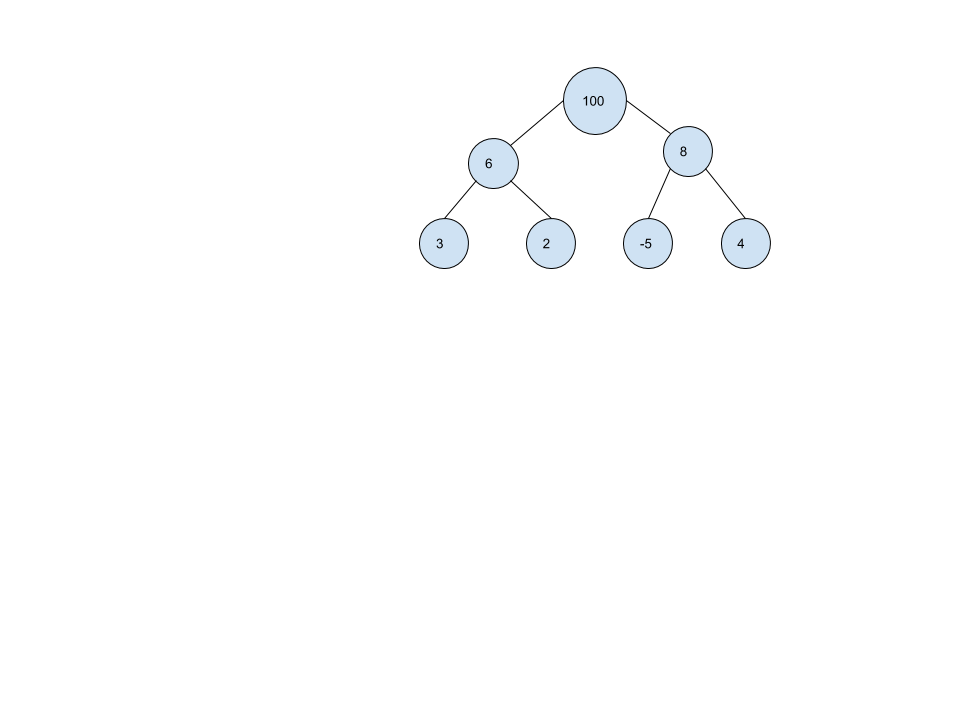

In [4]:
from IPython.display import Image
Image("drawing.png")

Yes, the array given to us is a max priority queue. The diagram above shows how, when written in the form of a heap, this represents a maz heap data structure which states that the parent element should be greater all of its children elements. So, this heap is a valid max heap which also illustrates that it is aslo a max priority queue.

### Task 1.
The following cell uses the Python implementation of a max priority queue. This a good time to review the Python code above and then follow the rest of these instructions.

In [5]:
# GOAL: BUILD HEAP FROM [4,3,6,8,2,-5,100]
#   Study the following lines of code, execute the cell and make sure you understand how the
#   Python implementation of the MaxHeapq is used here and the output from these lines.
A = [4,3,6,8,2,-5,100]
my_heap = MaxHeapq()

for key in A:
    my_heap.heappush(key)

print(my_heap.heap)

[100, 6, 8, 3, 2, -5, 4]


### Task 2. 
Given the list [6,4,7,9,10,-5,-6,12,8,3,1,-10], build a max heap. You should store the Python list that represents the max heap in a variable named `my_heap_list`.



In [11]:
import math
import random
my_heap_list=[]
def build_max_heap(A):
    for i in reversed(range(math.ceil(len(A) / 2))):
        heapify(A, i)
    return A

def heapify(A, i):
    l = 2 * i + 1
    r = 2 * i + 2
    n = len(A) -1 
    if l <= n and A[l] > A[i]:
        largest = l
    else:
        largest = i
    if r <= n and A[r] > A[largest]:
        largest = r
    if largest != i:
        A[i], A[largest] = A[largest], A[i]
        heapify(A, largest)
def heap_push(my_heap_list, x):
    my_heap_list.append(x)
    build_max_heap(my_heap_list)

# popping the max element from the heap
def heap_pop(my_heap_list):
    build_max_heap(my_heap_list)
    return my_heap_list
    
lisxt= [6,4,7,9,10,-5,-6,12,8,3,1,-10]
build_max_heap(lisxt)

[12, 10, 7, 9, 6, -5, -6, 4, 8, 3, 1, -10]

In [ ]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

### Task 3.
Using the Python code that implements the class `MaxHeapq` as a reference, build a class `MinHeapq`, a min priority queue. Your class should contain the following method: `mink`, `heappush`, `decrease_key`, `heapify`, and `heappop`.

In [21]:
class MinHeapq:
    """ 
    This class implements properties and methods that support a max priority queue data structure
    """  
    # Class initialization method. Use: heapq_var = MaxHeapq()
    def __init__(self):        
        self.heap       = []
        self.heap_size  = 0

    # This method returns the highest key in the priority queue. 
    #   Use: key_var = heapq_var.max()
    def mixn(self):              
        return self.heap[0]     
    
    # This method implements the INSERT key into a priority queue operation
    #   Use: heapq_var.heappush(key)
    def heappush(self, key):   
        """
        Inserts the value of key onto the priority queue, maintaining the max heap invariant.
        """
        self.heap.append(-float("inf"))
        self.decrease_key(self.heap_size,key)
        self.heap_size+=1
        
    # This method implements the DECREASE_KEY operation, which modifies the value of a key
    # in the min priority queue with a lower value. 
    #   Use heapq_var.increase_key(i, new_key)
    def decrease_key(self, i, key): 
        if key < self.heap[i]:
            raise ValueError('new key is greater than the current key')
        self.heap[i] = key
        while i > 0 and self.heap[parent(i)] > self.heap[i]:
            j = parent(i)
            holder = self.heap[j]
            self.heap[j] = self.heap[i]
            self.heap[i] = holder
            i = j    
            
    # This method implements the Min_HEAPIFY operation for the min priority queue. The input is 
    # the array index of the root node of the subtree to be heapify.
    #   Use heapq_var.heapify(i)        
    def heapify(self, i):
        l = left(i)
        r = right(i)
        heap = self.heap
        if l <= (self.heap_size-1) and heap[l]>heap[i]:
            smallest = l
        else:
            smallest = i
        if r <= (self.heap_size-1) and heap[r] < heap[smallest]:
            smallest = r
        if smallest != i:
            heap[i], heap[smallest] = heap[smallest], heap[i]
            self.heapify(smallest)

    # This method implements the EXTRACT_MAX operation. It returns the largest key in 
    # the max priority queue and removes this key from the max priority queue.
    #   Use key_var = heapq_var.heappop() 
    def heappop(self):
        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue ')
        mixn = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size-=1
        self.heapify(0)
        return mixn

In [22]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

### Task 4. 

Use your `MinHeapq` implementation to build a min priority queue out of the list [6,4,7,9,10,-5,-6,12,8,3,1,-10]. You should store the Python list that represents the min heap in a variable named `my_heap_list`.

In [24]:
A = [6,4,7,9,10,-5,-6,12,8,3,1,-10]
my_heap = MinHeapq()

for key in A:
    my_heap.heappush(key)

print(my_heap.heap)

[-10, 1, -6, 8, 3, -5, 4, 12, 9, 10, 6, 7]


In [ ]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 